# Merged ROR data

In [1]:
import pandas as pd

smiles_df = pd.read_csv('ROR4mcda.smi', sep='\t')
tsv_df = pd.read_csv('rules_clean.tsv', sep='\t')
combined_df = pd.merge(smiles_df, tsv_df, on=['Identifier', 'act_median_expert'])
combined_df.head()

FileNotFoundError: [Errno 2] No such file or directory: 'ROR4mcda.smi'

In [ ]:
combined_df.rename(columns={'act_median_expert': 'target'}, inplace=True)

selected_df = combined_df[['SMILES', 'target']]

selected_df.to_csv('ROR_data.csv', index=False)

In [ ]:
selected_df = combined_df[['SMILES', 'target']]

selected_df.to_csv('ROR_data.csv', index=False)

# EDA on ROR/BACE data

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
ror_data = pd.read_csv('ROR_data_1.csv')
bace_data = pd.read_csv('bace.csv')
bace_data = bace_data[['mol', 'pIC50']]

In [5]:
ror_data.head()

,SMILES,target
0,C(=O)(Cc1ccc(S(=O)(=O)CC)cc1)N,500000.0
1,C(=O)(Nc1cc(Cl)c(OCC)cc1)C,216000.0
2,O=S(=O)(c1c2c3c(C(=O)N(c3cc1)CC)ccc2)NCc4ccc(O...,174400.0
3,C(=O)(c1cc(ccc1)COc2ccc(Cl)cc2)Nc3ccc(C(=O)N)cc3,168270.0
4,C(=O)(c1c(NS(=O)(=O)c2c3c4c(C(=O)N(c4cc2)CC)cc...,156300.0


In [6]:
bace_data.head()

,mol,pIC50
0,O1CC[C@@H](NC(=O)[C@@H](Cc2cc3cc(ccc3nc2N)-c2c...,9.154901
1,Fc1cc(cc(F)c1)C[C@H](NC(=O)[C@@H](N1CC[C@](NC(...,8.853872
2,S1(=O)(=O)N(c2cc(cc3c2n(cc3CC)CC1)C(=O)N[C@H](...,8.698970
3,S1(=O)(=O)C[C@@H](Cc2cc(O[C@H](COCC)C(F)(F)F)c...,8.698970
4,S1(=O)(=O)N(c2cc(cc3c2n(cc3CC)CC1)C(=O)N[C@H](...,8.698970


In [7]:
!pip install rdkit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 25.4 MB/s eta 0:00:00


In [8]:
from rdkit import Chem

In [9]:
bace_data['SMILES'] = bace_data['mol'].map(lambda x: Chem.MolToSmiles(Chem.MolFromSmiles(x)))

In [10]:
ror_data['SMILES'] = ror_data['SMILES'].map(lambda x: Chem.MolToSmiles(Chem.MolFromSmiles(x)))

In [11]:
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Draw

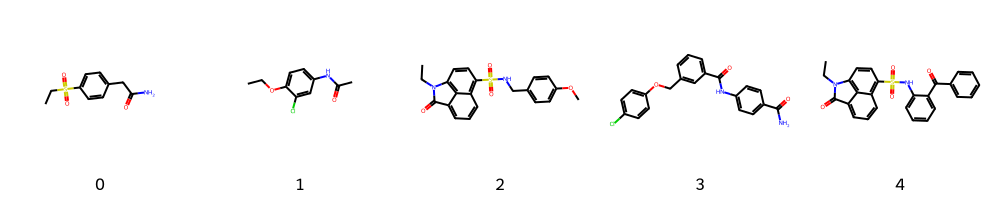

In [12]:
mols = [Chem.MolFromSmiles(smi) for smi in ror_data['SMILES'].head(5)]
Draw.MolsToGridImage(mols, molsPerRow=5, legends=[str(i) for i in range(len(mols))])

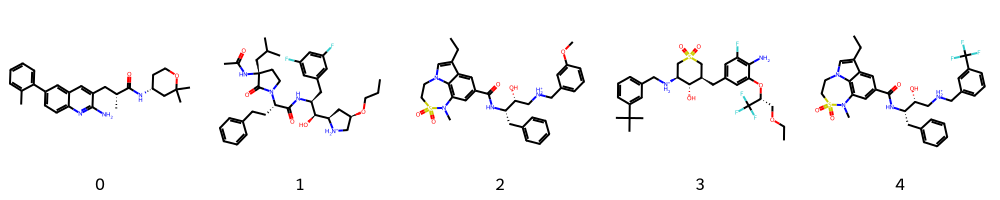

In [13]:
mols = [Chem.MolFromSmiles(smi) for smi in bace_data['SMILES'].head(5)]
Draw.MolsToGridImage(mols, molsPerRow=5, legends=[str(i) for i in range(len(mols))])

In [14]:
bace_data['SMILES'].duplicated().sum()

0

In [15]:
ror_data['SMILES'].duplicated().sum()

0

In [16]:
bace_data.isnull().sum()

mol       0
pIC50     0
SMILES    0
dtype: int64

In [17]:
ror_data.isnull().sum()

SMILES    0
target    0
dtype: int64

In [18]:
bace_data.describe()

,pIC50
count,1513.000000
mean,6.521991
std,1.342417
min,2.544546
25%,5.585027
50%,6.761954
75%,7.540000
max,10.522879


In [19]:
ror_data.describe()

,target
count,2186.000000
mean,3210.183513
std,16434.044375
min,0.370000
25%,49.000000
50%,146.000000
75%,825.037500
max,500000.000000


In [20]:
import numpy as np

ror_data['log10_values'] = - np.log10(ror_data['target'])
ror_data['log10_values_9'] = - np.log10(ror_data['target'] * 10**(-9))
ror_data['log10_values_7'] = - np.log10(ror_data['target'] * 10**(-7))

In [21]:
ror_data.describe()

,target,log10_values,log10_values_9,log10_values_7
count,2186.000000,2186.000000,2186.000000,2186.000000
mean,3210.183513,-2.327739,6.672261,4.672261
std,16434.044375,0.959939,0.959939,0.959939
min,0.370000,-5.698970,3.301030,1.301030
25%,49.000000,-2.916474,6.083526,4.083526
50%,146.000000,-2.164353,6.835647,4.835647
75%,825.037500,-1.690196,7.309804,5.309804
max,500000.000000,0.431798,9.431798,7.431798


In [22]:
bace_data.describe()

,pIC50
count,1513.000000
mean,6.521991
std,1.342417
min,2.544546
25%,5.585027
50%,6.761954
75%,7.540000
max,10.522879


In [23]:
ror_data['activity'] =  ror_data['log10_values_9'] > 6
bace_data['activity'] =  bace_data['pIC50'] > 6

In [24]:
bace_data.activity.value_counts()

True     1012
False     501
Name: activity, dtype: int64

In [25]:
ror_data.activity.value_counts()

True     1681
False     505
Name: activity, dtype: int64

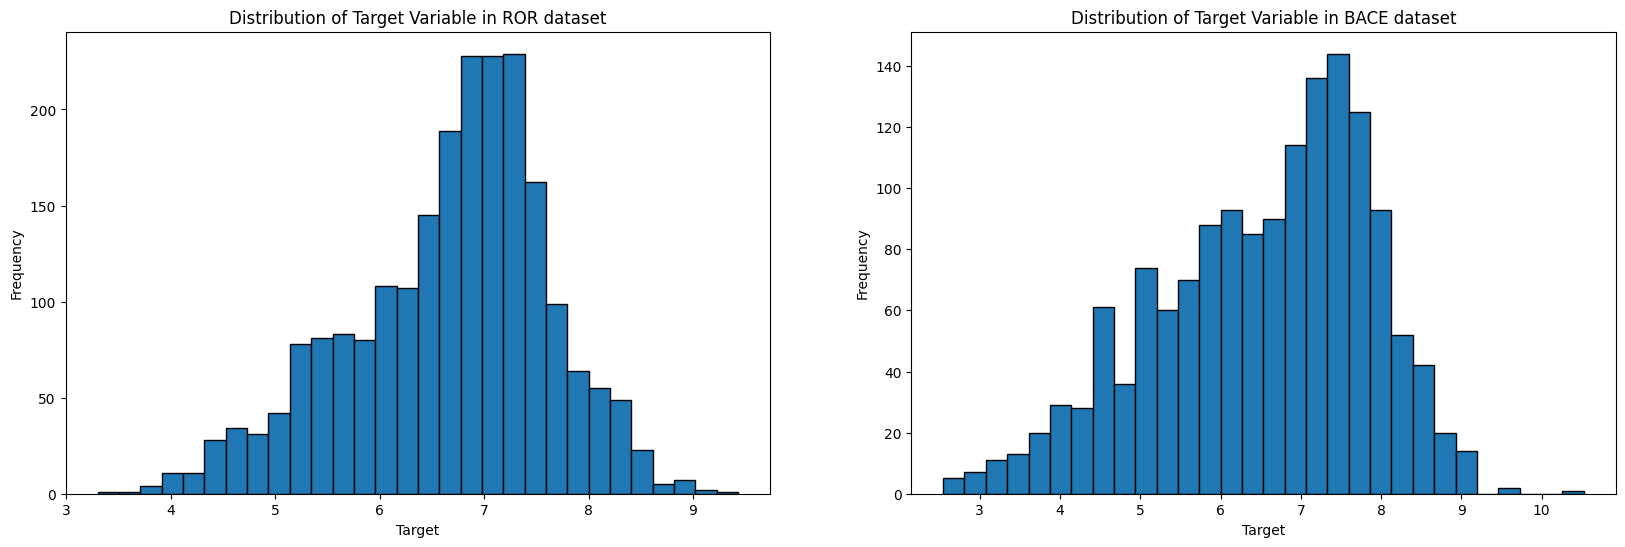

In [26]:
plt.figure(figsize=(20, 6))

plt.subplot(1, 2, 1)
plt.hist(ror_data['log10_values_9'], bins=30, edgecolor='black')
plt.title('Distribution of Target Variable in ROR dataset')
plt.xlabel('Target')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(bace_data['pIC50'], bins=30, edgecolor='black')
plt.title('Distribution of Target Variable in BACE dataset')
plt.xlabel('Target')
plt.ylabel('Frequency')

plt.show()

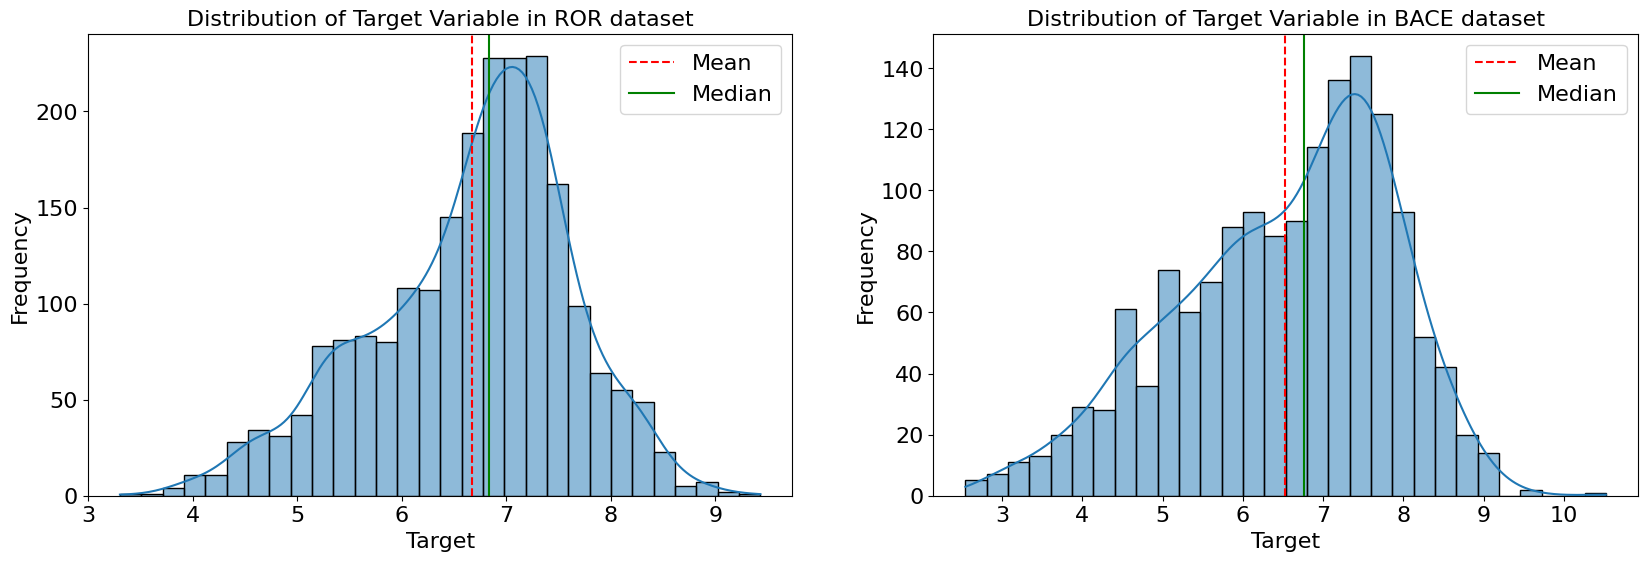

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

plt.figure(figsize=(20, 6))

import matplotlib

matplotlib.rc('font', size=16)
matplotlib.rc('axes', titlesize=16)

plt.subplot(1, 2, 1)
sns.histplot(ror_data['log10_values_9'], bins=30, kde=True, edgecolor='black')
plt.axvline(x=ror_data['log10_values_9'].mean(), color='r', linestyle='--', label='Mean')
plt.axvline(x=ror_data['log10_values_9'].median(), color='g', linestyle='-', label='Median')
plt.title('Distribution of Target Variable in ROR dataset')
plt.xlabel('Target')
plt.ylabel('Frequency')
plt.legend()

plt.subplot(1, 2, 2)
sns.histplot(bace_data['pIC50'], bins=30, kde=True, edgecolor='black')
plt.axvline(x=bace_data['pIC50'].mean(), color='r', linestyle='--', label='Mean')
plt.axvline(x=bace_data['pIC50'].median(), color='g', linestyle='-', label='Median')
plt.title('Distribution of Target Variable in BACE dataset')
plt.xlabel('Target')
plt.ylabel('Frequency')
plt.legend()

plt.show()

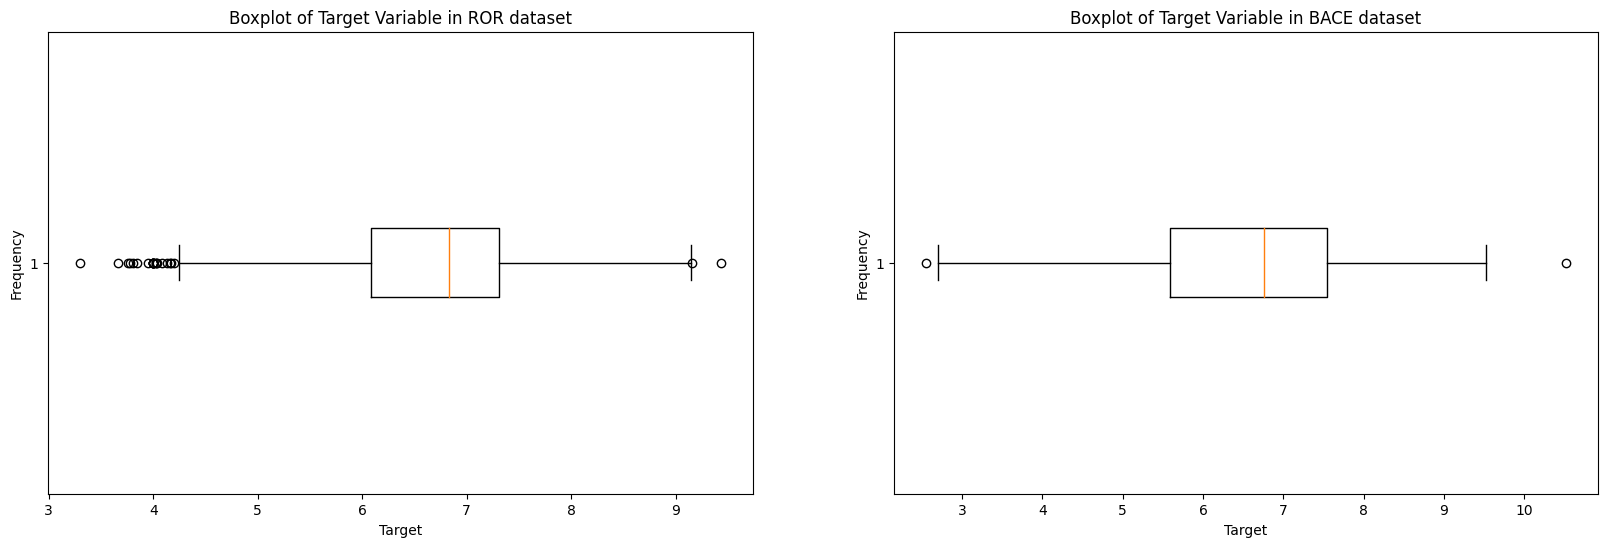

In [28]:
plt.figure(figsize=(20, 6))

plt.subplot(1, 2, 1)
plt.boxplot(ror_data['log10_values_9'], vert=False)
plt.title('Boxplot of Target Variable in ROR dataset')
plt.xlabel('Target')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.boxplot(bace_data['pIC50'], vert=False)
plt.title('Boxplot of Target Variable in BACE dataset')
plt.xlabel('Target')
plt.ylabel('Frequency')

plt.show()

# Preprocessing

In [29]:
!pip install mordred

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.8/128.8 kB 1.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 11.6 MB/s eta 0:00:00
  Created wheel for mordred: filename=mordred-1.2.0-py3-none-any.whl size=176721 sha256=438f98bb37a90895a0b77aee637cb571585b7c3e811804d298c3e08bde54fb67
  Stored in directory: /root/.cache/pip/wheels/a7/4f/b8/d4c6591f6ac944aaced7865b349477695f662388ad958743c7
Successfully built mordred
  Attempting uninstall: networkx
    Found existing installation: networkx 3.2.1
    Uninstalling networkx-3.2.1:
      Successfully uninstalled networkx-3.2.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires kaleido, which is not installed.
lida 0.0.10 requires python-multipart, which is not installed.
lida 

In [30]:
import pandas as pd
import numpy as np

from mordred import Calculator, descriptors
from rdkit import Chem
from rdkit.Chem import AllChem

In [31]:
def CalculateMorganFingerprint(mol):
    mol = mol.apply(Chem.MolFromSmiles)
    mfpgen = AllChem.GetMorganGenerator(radius=2,fpSize=2048)
    fingerprint = np.array([mfpgen.GetFingerprintAsNumPy(x) for x in mol])
    fingerprint = pd.DataFrame(fingerprint, columns = ['mfp'+str(i) for i in range(fingerprint.shape[1])])
    return fingerprint

def CalculateDescriptors(mol):
    mol = mol.apply(Chem.MolFromSmiles)
    calc = Calculator(descriptors, ignore_3D=False)
    X_mordred = calc.pandas(mol, nproc=1)
    X_mordred = X_mordred.select_dtypes(['number'])
    #normalize
    X_mordred = (X_mordred-X_mordred.min())/(X_mordred.max()-X_mordred.min())
    #drop columns wth low std
    X_mordred = X_mordred.loc[:,X_mordred.std()>0.01]
    return X_mordred

In [32]:
bace_data_fp = CalculateMorganFingerprint(bace_data['SMILES'])
bace_data_descriptors = CalculateDescriptors(bace_data['SMILES'])

ror_data_fp = CalculateMorganFingerprint(ror_data['SMILES'])
ror_data_descriptors = CalculateDescriptors(ror_data['SMILES'])

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
100%|██████████| 2186/2186 [19:09<00:00,  1.90it/s]


In [33]:
bace_data_fp['SMILES'] = bace_data['SMILES']
bace_data_fp['pIC50'] = bace_data['pIC50']

bace_data_descriptors['SMILES'] = bace_data['SMILES']
bace_data_descriptors['pIC50'] = bace_data['pIC50']

ror_data_fp['SMILES'] = ror_data['SMILES']
ror_data_fp['pIC50'] = ror_data['log10_values_9']

ror_data_descriptors['SMILES'] = ror_data['SMILES']
ror_data_descriptors['pIC50'] = ror_data['log10_values_9']

In [34]:
bace_data_fp.drop('pIC50', axis=1).describe()

,mfp0,mfp1,mfp2,mfp3,mfp4,mfp5,mfp6,mfp7,mfp8,mfp9,...,mfp2038,mfp2039,mfp2040,mfp2041,mfp2042,mfp2043,mfp2044,mfp2045,mfp2046,mfp2047
count,1513.000000,1513.000000,1513.000000,1513.000000,1513.000000,1513.000000,1513.000000,1513.000000,1513.000000,1513.000000,...,1513.000000,1513.000000,1513.000000,1513.000000,1513.000000,1513.0,1513.000000,1513.000000,1513.000000,1513.000000
mean,0.012558,0.597488,0.104428,0.006609,0.002644,0.090549,0.001322,0.010575,0.001322,0.003305,...,0.003305,0.024455,0.001322,0.007931,0.020489,0.0,0.003966,0.015202,0.001322,0.004627
std,0.111393,0.490566,0.305916,0.081056,0.051366,0.287061,0.036346,0.102324,0.036346,0.057410,...,0.057410,0.154507,0.036346,0.088733,0.141713,0.0,0.062869,0.122394,0.036346,0.067884
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000


In [35]:
bace_data_descriptors.drop('pIC50', axis=1).describe()

,ABC,ABCGG,nAcid,nBase,SpAbs_A,SpMax_A,SpDiam_A,SpAD_A,SpMAD_A,LogEE_A,...,SRW10,TSRW10,MW,AMW,WPath,WPol,Zagreb1,Zagreb2,mZagreb1,mZagreb2
count,1513.000000,1513.000000,1513.000000,1513.000000,1513.000000,1513.000000,1513.000000,1513.000000,1513.000000,1513.000000,...,1513.000000,1513.000000,1513.000000,1513.000000,1513.000000,1513.000000,1513.000000,1513.000000,1513.000000,1513.000000
mean,0.292043,0.283091,0.008096,0.376074,0.287447,0.620646,0.589826,0.287447,0.556689,0.544641,...,0.697610,0.360701,0.281573,0.379594,0.056508,0.324212,0.310784,0.327289,0.244721,0.263502
std,0.096439,0.092988,0.058719,0.260226,0.097004,0.161860,0.142857,0.097004,0.172369,0.105898,...,0.093679,0.091988,0.100727,0.171827,0.049482,0.094285,0.094500,0.092354,0.103548,0.099929
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.223498,0.218963,0.000000,0.250000,0.219479,0.495466,0.492176,0.219479,0.439919,0.477725,...,0.655147,0.312119,0.207186,0.251617,0.025646,0.266187,0.247706,0.268000,0.167697,0.189755
50%,0.280131,0.270297,0.000000,0.250000,0.273892,0.623629,0.572389,0.273892,0.551231,0.545575,...,0.708020,0.360617,0.268379,0.351400,0.043462,0.316547,0.302752,0.320000,0.234544,0.246032
75%,0.355979,0.341337,0.000000,0.500000,0.348778,0.776625,0.716947,0.348778,0.683133,0.620193,...,0.754952,0.411009,0.351720,0.480648,0.077190,0.381295,0.376147,0.386000,0.312210,0.325397
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [36]:
ror_data_fp.drop('pIC50', axis=1).describe()

,mfp0,mfp1,mfp2,mfp3,mfp4,mfp5,mfp6,mfp7,mfp8,mfp9,...,mfp2038,mfp2039,mfp2040,mfp2041,mfp2042,mfp2043,mfp2044,mfp2045,mfp2046,mfp2047
count,2186.000000,2186.000000,2186.000000,2186.000000,2186.000000,2186.000000,2186.000000,2186.000000,2186.000000,2186.000000,...,2186.000000,2186.000000,2186.000000,2186.000000,2186.000000,2186.000000,2186.000000,2186.000000,2186.000000,2186.000000
mean,0.093779,0.276761,0.040256,0.000915,0.003202,0.089661,0.001372,0.002287,0.006404,0.058097,...,0.063129,0.018756,0.000915,0.015554,0.009607,0.006404,0.002287,0.005032,0.002745,0.004117
std,0.291587,0.447500,0.196604,0.030241,0.056510,0.285762,0.037029,0.047782,0.079789,0.233980,...,0.243250,0.135692,0.030241,0.123768,0.097564,0.079789,0.047782,0.070774,0.052330,0.064047
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [37]:
ror_data_descriptors.drop('pIC50', axis=1).describe()

,ABC,ABCGG,nAcid,nBase,SpAbs_A,SpMax_A,SpDiam_A,SpAD_A,SpMAD_A,LogEE_A,...,SRW10,TSRW10,MW,AMW,WPath,WPol,Zagreb1,Zagreb2,mZagreb1,mZagreb2
count,2186.000000,2186.000000,2186.000000,2186.000000,2186.000000,2186.000000,2186.000000,2186.000000,2186.000000,2186.000000,...,2186.000000,2186.000000,2186.000000,2186.000000,2186.000000,2186.000000,2186.000000,2186.000000,2186.000000,2186.000000
mean,0.538195,0.524715,0.091949,0.037511,0.534405,0.273838,0.252627,0.534405,0.496465,0.685109,...,0.479600,0.593146,0.524562,0.398679,0.302130,0.490440,0.531597,0.515976,0.466703,0.521021
std,0.164927,0.179378,0.196093,0.136017,0.156234,0.094024,0.092789,0.156234,0.185516,0.136106,...,0.108203,0.195308,0.176729,0.142464,0.163855,0.183408,0.167770,0.169319,0.202434,0.162338
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.423576,0.390666,0.000000,0.000000,0.428837,0.203482,0.181700,0.428837,0.370842,0.596316,...,0.401479,0.402203,0.395555,0.284764,0.186872,0.353535,0.414062,0.392097,0.302486,0.410785
50%,0.501821,0.475268,0.000000,0.000000,0.505465,0.287221,0.252099,0.505465,0.476259,0.669937,...,0.469460,0.605293,0.484059,0.418699,0.258737,0.444444,0.492188,0.477204,0.408840,0.490087
75%,0.644319,0.656497,0.000000,0.000000,0.631168,0.371918,0.351293,0.631168,0.620560,0.783752,...,0.566435,0.749674,0.660150,0.499723,0.378633,0.595960,0.640625,0.629179,0.641989,0.615385
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [38]:
df_corr = bace_data_descriptors.drop(['pIC50', 'SMILES'], axis=1).apply(lambda x: x.corr(bace_data_descriptors.pIC50))
sorted_corr = df_corr.abs().sort_values(ascending=False)
n = 3
top_n_features = sorted_corr.head(n)
print(f"Top {n} features most correlated with the target: \n{top_n_features}", )

Top 3 features most correlated with the target: 
SRW08    0.578039
SRW10    0.571450
MWC05    0.566897
dtype: float64


In [39]:
df_corr = ror_data_descriptors.drop(['pIC50', 'SMILES'], axis=1).apply(lambda x: x.corr(ror_data_descriptors.pIC50))
sorted_corr = df_corr.abs().sort_values(ascending=False)
n = 3
top_n_features = sorted_corr.head(n)
print(f"Top {n} features most correlated with the target: \n{top_n_features}", )

Top 3 features most correlated with the target: 
Xp-1dv    0.362814
Xp-2dv    0.360734
ATS0p     0.360247
dtype: float64


In [40]:
df_corr = bace_data_fp.drop(['pIC50', 'SMILES'], axis=1).apply(lambda x: x.corr(bace_data_fp.pIC50))
sorted_corr = df_corr.abs().sort_values(ascending=False)
n = 3
top_n_features = sorted_corr.head(n)
print(f"Top {n} features most correlated with the target: \n{top_n_features}", )

Top 3 features most correlated with the target: 
mfp964     0.361797
mfp1855    0.301064
mfp1928    0.301010
dtype: float64


In [41]:
df_corr = ror_data_fp.drop(['pIC50', 'SMILES'], axis=1).apply(lambda x: x.corr(ror_data_fp.pIC50))
sorted_corr = df_corr.abs().sort_values(ascending=False)
n = 3
top_n_features = sorted_corr.head(n)
print(f"Top {n} features most correlated with the target: \n{top_n_features}", )

Top 3 features most correlated with the target: 
mfp670     0.274789
mfp1705    0.268229
mfp1326    0.259932
dtype: float64


In [42]:
bace_data_descriptors[['pIC50']]

,pIC50
0,9.154901
1,8.853872
2,8.698970
3,8.698970
4,8.698970
...,...
1508,3.000000
1509,3.000000
1510,2.953115
1511,2.733298


In [43]:
ror_data_descriptors[['pIC50']]

,pIC50
0,3.301030
1,3.665546
2,3.758454
3,3.773993
4,3.806041
...,...
2181,8.920819
2182,8.958607
2183,9.148742
2184,9.161151


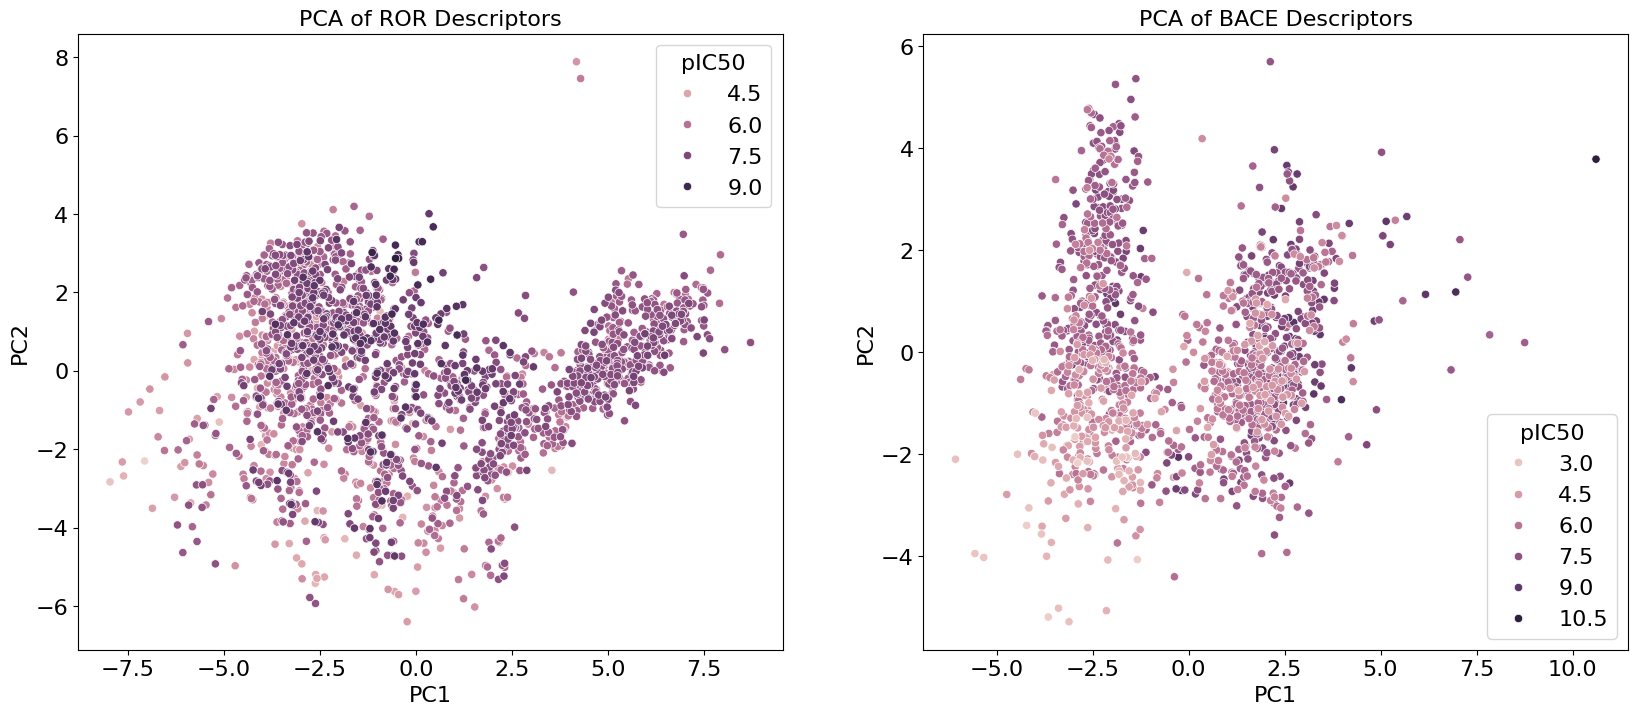

In [49]:
from sklearn.decomposition import PCA

plt.figure(figsize=(20, 8))

import matplotlib

matplotlib.rc('font', size=16)
matplotlib.rc('axes', titlesize=16)

pca = PCA(n_components=2)
principal_components = pca.fit_transform(ror_data_descriptors.drop(['pIC50', 'SMILES'], axis=1).select_dtypes(include=['float64', 'int64']))
principal_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
final_df = pd.concat([principal_df, ror_data_descriptors[['pIC50']]], axis=1)

plt.subplot(1, 2, 1)
sns.scatterplot(x='PC1', y='PC2', hue='pIC50', data=final_df)
plt.title('PCA of ROR Descriptors')


pca = PCA(n_components=2)
principal_components = pca.fit_transform(bace_data_descriptors.drop(['pIC50', 'SMILES'], axis=1).select_dtypes(include=['float64', 'int64']))
principal_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
final_df = pd.concat([principal_df, bace_data_descriptors[['pIC50']]], axis=1)

plt.subplot(1, 2, 2)
sns.scatterplot(x='PC1', y='PC2', hue='pIC50', data=final_df)
plt.title('PCA of BACE Descriptors')
plt.show()

In [45]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
import pandas as pd

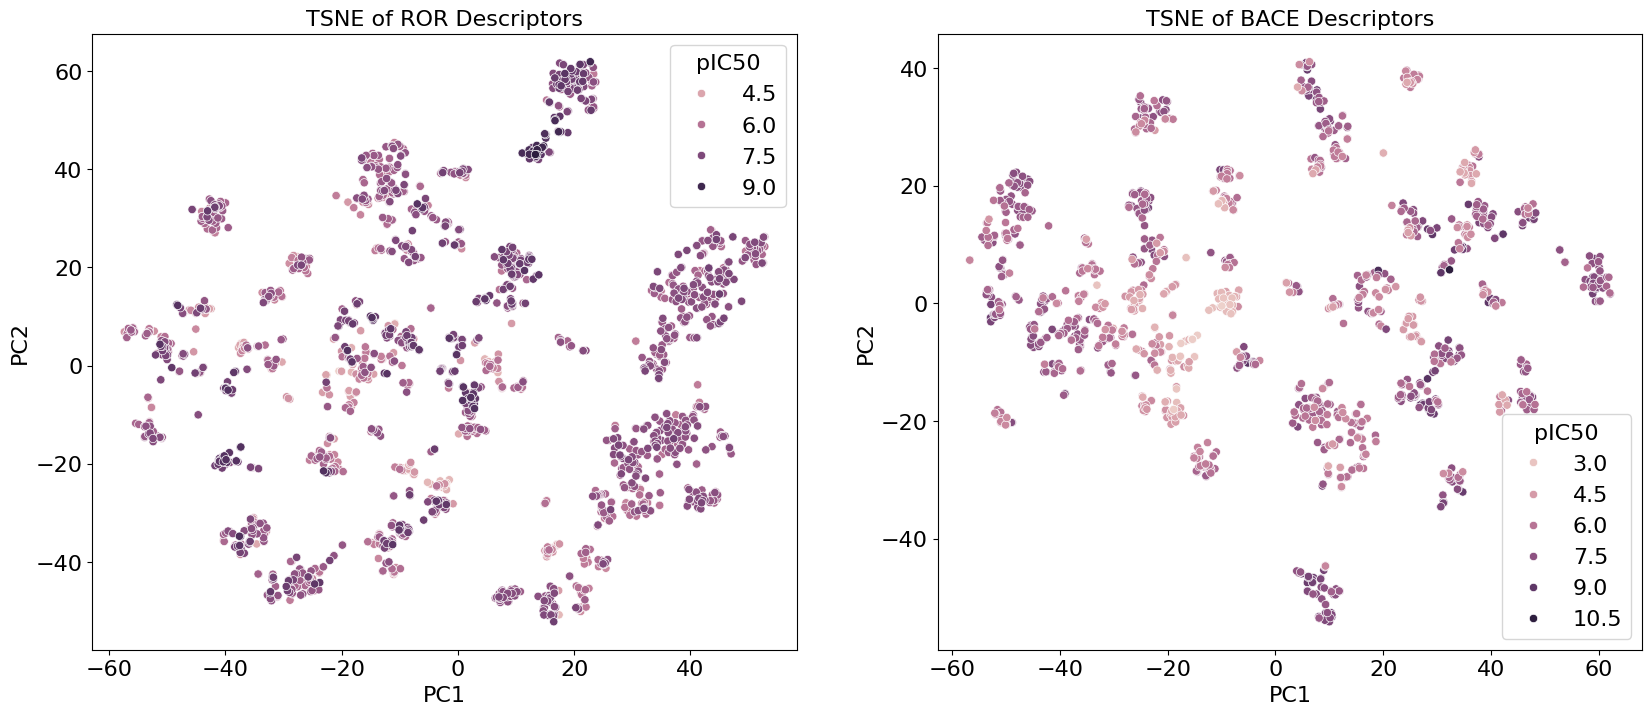

In [51]:
from sklearn.decomposition import PCA

plt.figure(figsize=(20, 8))


tsne = TSNE(n_components=2, random_state=0)
features_tsne = tsne.fit_transform(ror_data_descriptors.drop(['pIC50', 'SMILES'], axis=1).select_dtypes(include=['float64', 'int64']))
principal_df = pd.DataFrame(data=features_tsne, columns=['PC1', 'PC2'])
final_df = pd.concat([principal_df, ror_data_descriptors[['pIC50']]], axis=1)

plt.subplot(1, 2, 1)
sns.scatterplot(x='PC1', y='PC2', hue='pIC50', data=final_df)
plt.title('TSNE of ROR Descriptors')


tsne = TSNE(n_components=2, random_state=0)
features_tsne = tsne.fit_transform(bace_data_descriptors.drop(['pIC50', 'SMILES'], axis=1).select_dtypes(include=['float64', 'int64']))
principal_df = pd.DataFrame(data=features_tsne, columns=['PC1', 'PC2'])
final_df = pd.concat([principal_df, bace_data_descriptors[['pIC50']]], axis=1)

plt.subplot(1, 2, 2)
sns.scatterplot(x='PC1', y='PC2', hue='pIC50', data=final_df)
plt.title('TSNE of BACE Descriptors')
plt.show()